In [16]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
reviews = pd.read_parquet('../dataset/reviews.parquet')
items = pd.read_parquet('../dataset/items.parquet')
games = pd.read_parquet('../dataset/games.parquet')

In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   funny               59305 non-null  int32         
 1   last_edited         4277 non-null   datetime64[ns]
 2   item_id             59305 non-null  int32         
 3   recommend           59305 non-null  bool          
 4   review              59305 non-null  object        
 5   sentiment_analysis  59305 non-null  int64         
 6   user_id             59305 non-null  object        
 7   posted_date         49186 non-null  datetime64[ns]
 8   Useful_recommend    59305 non-null  int32         
 9   #_recommend         59305 non-null  int32         
 10  %_recommend         59305 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(1), int32(4), int64(1), object(2)
memory usage: 3.7+ MB


In [4]:
reviews.describe()

,funny,last_edited,item_id,sentiment_analysis,posted_date,Useful_recommend,#_recommend,%_recommend
count,59305.000000,4277,59305.000000,59305.000000,49186,59305.000000,59305.000000,59305.000000
mean,1.194081,2015-01-12 14:12:49.324292608,169935.176511,1.468847,2014-09-08 16:51:37.466758400,2.403271,3.935722,0.280682
min,0.000000,2013-11-25 00:00:00,10.000000,0.000000,2010-10-16 00:00:00,0.000000,0.000000,0.000000
25%,0.000000,2014-06-30 00:00:00,8930.000000,1.000000,2014-02-20 00:00:00,0.000000,0.000000,0.000000
50%,0.000000,2015-01-30 00:00:00,218230.000000,2.000000,2014-09-11 00:00:00,0.000000,0.000000,0.000000
75%,0.000000,2015-07-25 00:00:00,261760.000000,2.000000,2015-05-03 00:00:00,1.000000,2.000000,0.570000
max,2598.000000,2015-12-31 00:00:00,527340.000000,2.000000,2015-12-31 00:00:00,831.000000,954.000000,1.000000
std,25.631882,NaN,132029.464174,0.757096,NaN,20.051660,26.526004,0.393552


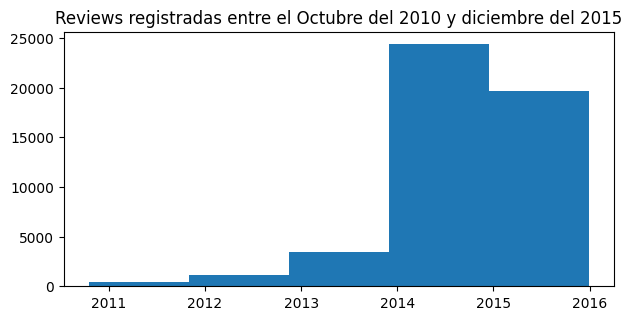

In [5]:

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(reviews['posted_date'], bins=5)
plt.title('Reviews registradas entre el Octubre del 2010 y diciembre del 2015')
plt.tight_layout()
plt.show()

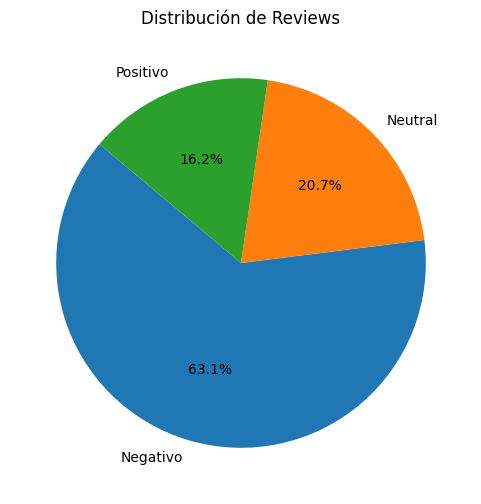

In [6]:
import matplotlib.pyplot as plt

# Calcula los conteos de cada valor en 'sentiment_analysis'
counts = reviews['sentiment_analysis'].value_counts()

# Define las etiquetas para cada valor
labels = ['Negativo', 'Neutral', 'Positivo']

# Crea el gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)

# Añade un título
plt.title('Distribución de Reviews')

plt.show()

Valores atipicos para la columna `playtime_forever` del dataframe `items`

<Axes: >

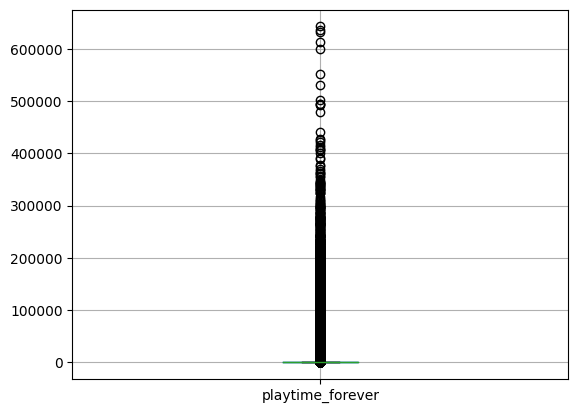

In [7]:
items.boxplot(column='playtime_forever')

El rango intercuartil para esta columna es

In [8]:
Q1_4ever = items['playtime_forever'].quantile(0.25)
Q3_4ever = items['playtime_forever'].quantile(0.75)
IQR_4ever = Q3_4ever - Q1_4ever

if Q1_4ever - 1.5 * IQR_4ever < 0:
    lower_limit_4ever = 0
else:
    lower_limit_4ever = Q1_4ever - 1.5 * IQR_4ever

upper_limit_4ever = Q3_4ever + 1.5 * IQR_4ever

print("Limite inferior", lower_limit_4ever, "Limite superior", upper_limit_4ever)


Limite inferior 0 Limite superior 887.5


Gráfica de distribucion de horas de juego de por vida

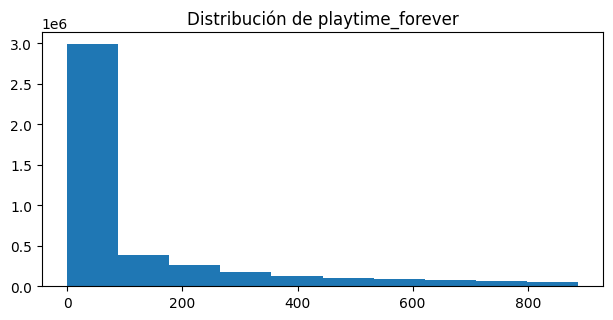

In [9]:
playtime_4ever = items[(items['playtime_forever'] >= lower_limit_4ever) & (items['playtime_forever'] <= upper_limit_4ever)]
playtime_4ever = playtime_4ever.dropna(subset=['playtime_forever'])

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(playtime_4ever['playtime_forever'], bins=10)
plt.title('Distribución de playtime_forever')
plt.tight_layout()
plt.show()

Top 10 videojuegos con mayor número de horas 

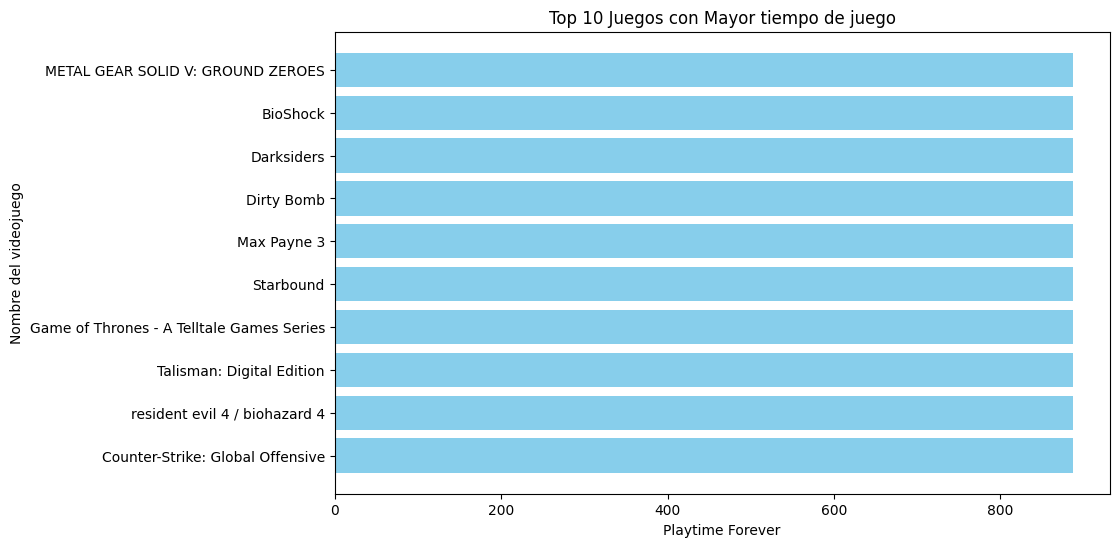

In [10]:
# Ordenar el DataFrame por playtime_forever de forma descendente y seleccionar las 10 mejores filas
top_10_games = playtime_4ever.sort_values(by='playtime_forever', ascending=False).head(10)

# Crear un gráfico de barras para visualizar los 10 juegos con mayor playtime_forever
plt.figure(figsize=(10, 6))
plt.barh(top_10_games['item_name'], top_10_games['playtime_forever'], color='skyblue')
plt.xlabel('Playtime Forever')
plt.ylabel('Nombre del videojuego')
plt.title('Top 10 Juegos con Mayor tiempo de juego')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar el juego con más playtime en la parte superior
plt.show()


El videojuego más jugado de los últimos 3 años

In [11]:
# Suponiendo que 'posted_date' es una cadena de texto en formato 'yyyy-mm-dd'
reviews['posted_date'] = pd.to_datetime(reviews['posted_date'])

print("Número de fechas no válidas antes de eliminar:", reviews['posted_date'].isnull().sum())

# Eliminar las filas con fechas no válidas (valores nulos) en 'posted_date'
reviews = reviews.dropna(subset=['posted_date'])

# Después de eliminar fechas no válidas, puedes verificar cuántas fechas no válidas quedan
print("Número de fechas no válidas después de eliminar:", reviews['posted_date'].isnull().sum())

Número de fechas no válidas antes de eliminar: 10119
Número de fechas no válidas después de eliminar: 0


In [12]:
# Filtrar las reseñas y los tiempos de juego de la última década
start_date = pd.to_datetime('2010-01-01')
end_date = pd.to_datetime('2013-12-31')
filtered_reviews = reviews[(reviews['posted_date'] >= start_date) & (reviews['posted_date'] <= end_date)]
fecha = filtered_reviews[['posted_date','item_id']]
data = playtime_4ever[['item_id','item_name','playtime_forever']]
combined_data = data.merge(fecha, on='item_id', how='inner')

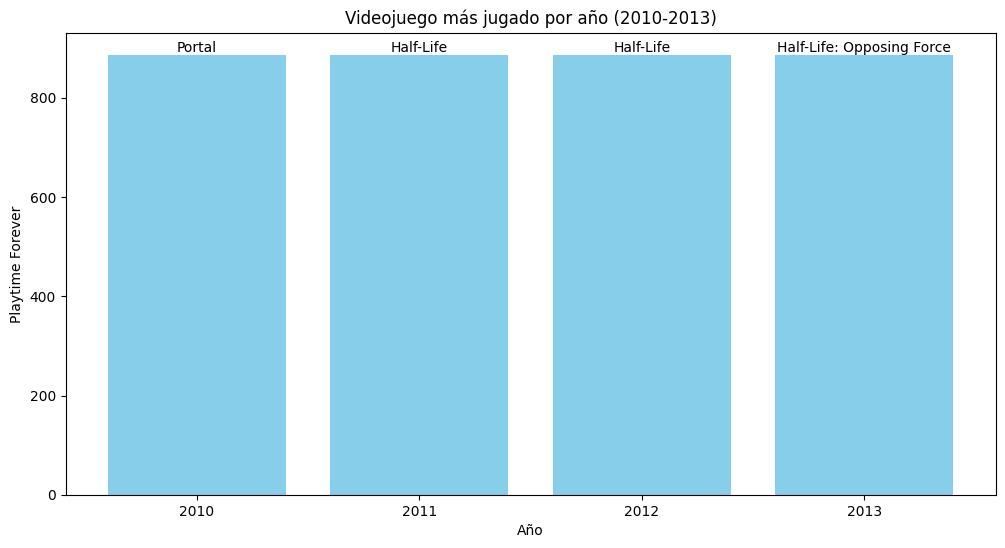

In [13]:
most_played_by_year = combined_data.groupby(combined_data['posted_date'].dt.year)['playtime_forever'].idxmax()
most_played_games = combined_data.loc[most_played_by_year, ['posted_date', 'item_name', 'playtime_forever']]

# Crear un gráfico de barras que muestra el videojuego más jugado por año
plt.figure(figsize=(12, 6))
plt.bar(most_played_games['posted_date'].dt.year, most_played_games['playtime_forever'], color='skyblue')
plt.xlabel('Año')
plt.ylabel('Playtime Forever')
plt.title('Videojuego más jugado por año (2010-2013)')

# Agregar etiquetas con el nombre del juego correspondiente
for i, row in most_played_games.iterrows():
    plt.text(row['posted_date'].year, row['playtime_forever'], row['item_name'], ha='center', va='bottom')

plt.xticks(most_played_games['posted_date'].dt.year)
plt.show()


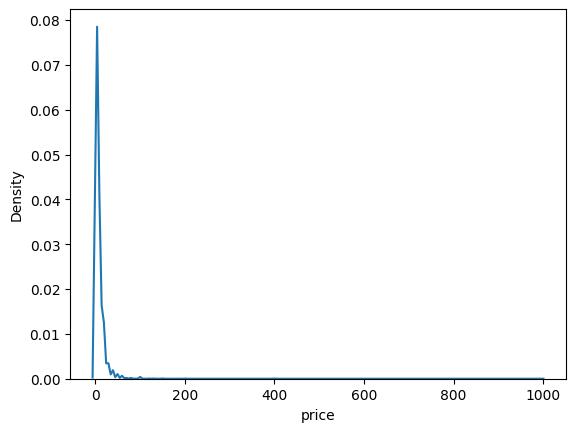

In [19]:
# Importa las bibliotecas necesarias
import seaborn as sns
import matplotlib.pyplot as plt

# Crea la gráfica de densidad
sns.kdeplot(data=games, x='price')

# Muestra la gráfica
plt.show()

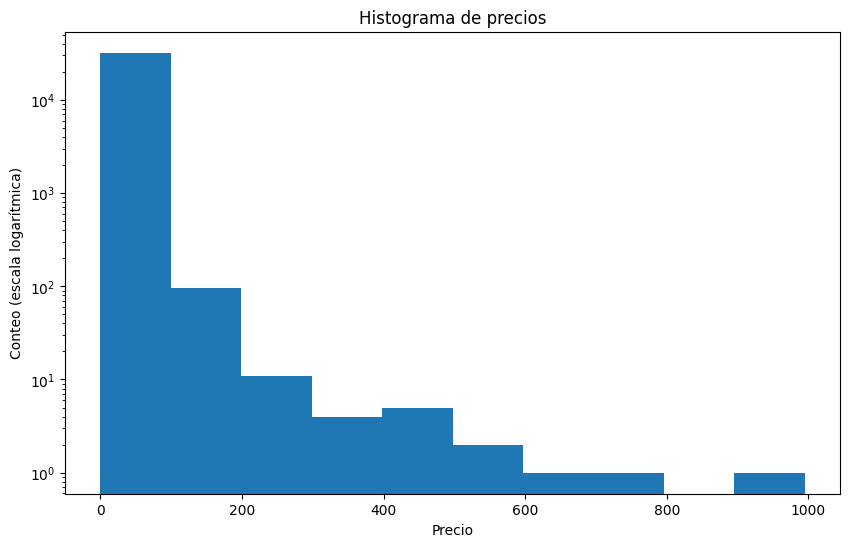

In [14]:
prices = games['price']

# Crea el histograma con escala logarítmica
plt.figure(figsize=(10, 6))
plt.hist(prices, bins=10, log=True)

plt.xlabel('Precio')
plt.ylabel('Conteo (escala logarítmica)')
plt.title('Histograma de precios')

plt.show()